In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/DataSet.zip

Archive:  /content/drive/MyDrive/DataSet.zip
   creating: DataSet/
   creating: DataSet/Test/
   creating: DataSet/Test/Acne/
  inflating: DataSet/Test/Acne/acne-cystic-119.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-120.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-121.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-122.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-123.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-124.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-125.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-126.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-127.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-128.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-129.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-130.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-131.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-132.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-133.jpg  
  inflating: DataSet/Test/Acne/acne-cystic-134.jpg  
  inflating: DataSet/Test/

In [ ]:
image_size = [224, 224, 3]
train = "/content/DataSet/Train"
test = "/content/DataSet/Test"

In [ ]:
ResNet = ResNet50(input_shape=image_size, weights='imagenet', include_top=False)
print(ResNet.summary())

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


# Freeze The weights

In [ ]:
for layer in ResNet.layers:
  layer.trainable = False

In [ ]:
Classes = glob('/content/DataSet/Train/*')
print(Classes)
Number_of_Classes = len(Classes)

['/content/DataSet/Train/Rosacea', '/content/DataSet/Train/Perioral_Dermatitis', '/content/DataSet/Train/Melanoma', '/content/DataSet/Train/Normal', '/content/DataSet/Train/Acne', '/content/DataSet/Train/Warts']


# Build the Model

In [ ]:
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(ResNet.output)

In [ ]:
FlattenLayer = Flatten()(global_avg_pooling_layer)

## Last Layer

In [ ]:
predictionLayer = Dense(Number_of_Classes, activation='softmax')(FlattenLayer)

In [ ]:
model = Model(inputs=ResNet.input, outputs=predictionLayer)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,600,006 (90.03 MB)

 Trainable params: 12,294 (48.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

## Data Augmentation

In [ ]:
train_Data_Gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_Data_Gen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_Set = train_Data_Gen.flow_from_directory(
    train,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 1740 images belonging to 6 classes.


In [ ]:
test_Set = test_Data_Gen.flow_from_directory(
    test,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 1740 images belonging to 6 classes.


In [ ]:
EPOCHS = 50
best_Model = '/content/ResNet_Model.keras'

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

callback = [
    ModelCheckpoint(best_Model, verbose=1, save_best_only=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=20, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=30, verbose=1)
]

# Train

In [ ]:
r = model.fit(
    training_Set,
    validation_data=test_Set,
    epochs=EPOCHS,
    steps_per_epoch=len(training_Set),
    validation_steps=len(test_Set),
    callbacks=callback
)

best_Accuracy = max(r.history['val_accuracy'])
print(f"Best Accuracy: {best_Accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.1960 - loss: 2.2566
Epoch 1: val_accuracy improved from -inf to 0.35575, saving model to /content/ResNet_Model.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.1967 - loss: 2.2514 - val_accuracy: 0.3557 - val_loss: 1.7230 - learning_rate: 0.0100
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.3490 - loss: 1.6270
Epoch 2: val_accuracy did not improve from 0.35575
55/55 ━━━━━━━━━━━━━━━━━━━━ 64s 943ms/step - accuracy: 0.3488 - loss: 1.6274 - val_accuracy: 0.3006 - val_loss: 1.5974 - learning_rate: 0.0100
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.3265 - loss: 1.6480
Epoch 3: val_accuracy did not improve from 0.35575
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 926ms/step - accuracy: 0.3263 - loss: 1.6478 - val_accuracy: 0.3259 - val_loss: 1.5082 - learning_rate: 0.0100
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.3892 - loss: 1.5145
Epoch 4: val_accuracy did not impr

##Plotting

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


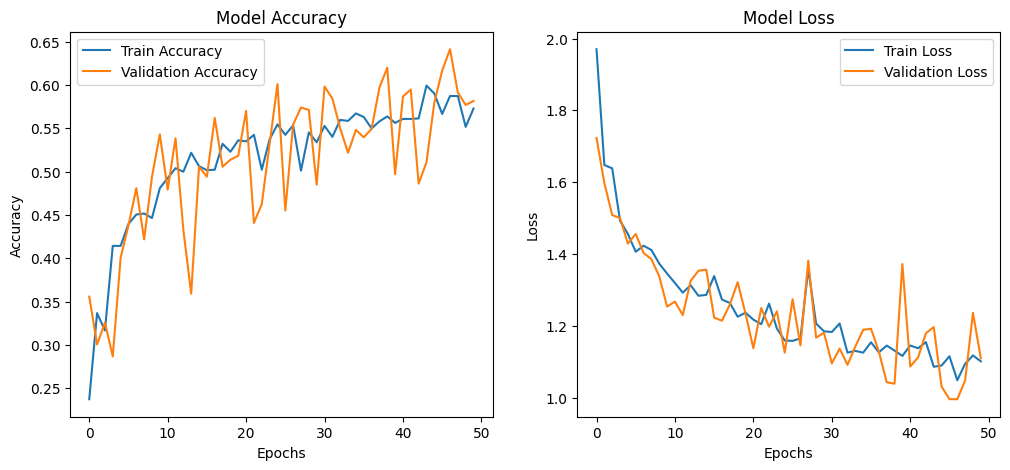

In [ ]:
print(r.history.keys())

def plot_training_history(r):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(r.history['accuracy'], label='Train Accuracy')
    plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(r.history['loss'], label='Train Loss')
    plt.plot(r.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

plot_training_history(r)

In [ ]:
from tensorflow.keras.models import load_model
ResNet = load_model("ResNet_Model.keras")

55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 520ms/step


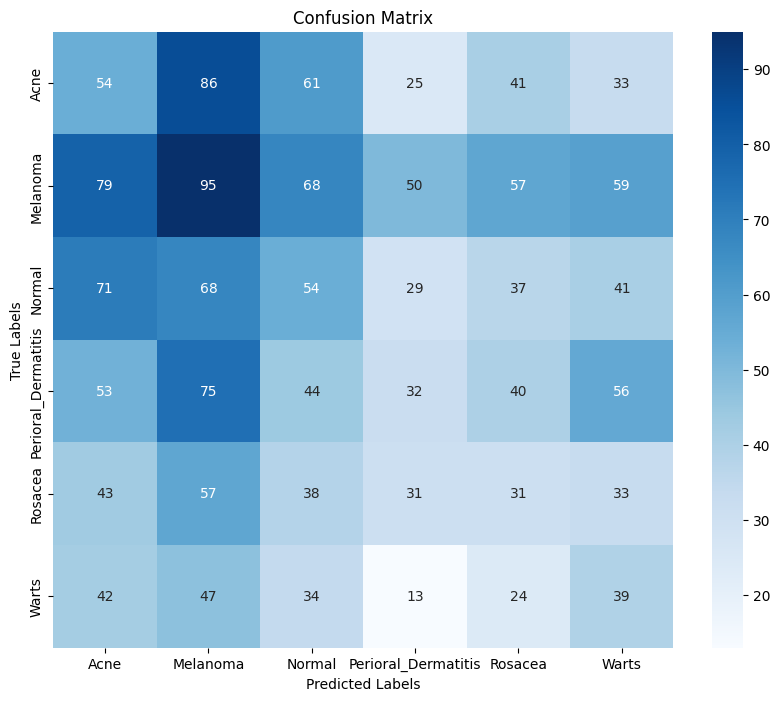

                     precision    recall  f1-score   support

               Acne       0.16      0.18      0.17       300
           Melanoma       0.22      0.23      0.23       408
             Normal       0.18      0.18      0.18       300
Perioral_Dermatitis       0.18      0.11      0.13       300
            Rosacea       0.13      0.13      0.13       233
              Warts       0.15      0.20      0.17       199

           accuracy                           0.18      1740
          macro avg       0.17      0.17      0.17      1740
       weighted avg       0.18      0.18      0.17      1740



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predictions
true_labels = training_Set.classes  # Actual labels from test dataset
predictions = ResNet.predict(training_Set)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class index

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_Set.class_indices, yticklabels=test_Set.class_indices)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=test_Set.class_indices.keys()))


In [ ]:
test_loss, test_acc = ResNet.evaluate(test_Set)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 495ms/step - accuracy: 0.6768 - loss: 0.9407
Test Accuracy: 66.72%
